In [37]:
import pandas as pd

import re
import string 
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv('mental_health.csv')
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [4]:
def make_lower(text):
    return text.lower()

In [9]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [10]:
df['text'] = df['text'].apply(make_lower)
df['text'] = df['text'].apply(remove_punct)
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [11]:
stop_words = stopwords.words('english')
stop_words.append('and')

In [13]:
X = df['text']

In [14]:
Xt = [word_tokenize(i) for i in X]

In [17]:
lem = WordNetLemmatizer()

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    
    elif tag.startswith('N'):
        return wordnet.NOUN
    
    elif tag.startswith('V'):
        return wordnet.VERB
    
    elif tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN


def lem_clean(words):
    output = []
    for w in words:
        if w not in stop_words and w.isalpha() == True:
            pos = pos_tag([w])
            clean_word = lem.lemmatize(w, get_simple_pos(pos[0][1]))
            output.append(clean_word)
    return output


                                       
            

In [18]:
Xm = [lem_clean(i) for i in Xt]

In [19]:
Xf = [' '.join(i) for i in Xm]

In [20]:
Y = df['label']

In [23]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xf, Y, test_size = 0.25, random_state = 10)
len(Xtrain), len(Xtest)

(20982, 6995)

In [27]:
vec = CountVectorizer()
Xtrain_v = vec.fit_transform(Xtrain)
Xtest_v = vec.transform(Xtest)


In [28]:
mnb = MultinomialNB()
mnb.fit(Xtrain_v, Ytrain)

MultinomialNB()

In [29]:
Ypred = mnb.predict(Xtest_v)

In [32]:
accuracy_score(Ytest, Ypred)  

0.8351679771265189

In [34]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81      3576
           1       0.75      0.99      0.85      3419

    accuracy                           0.84      6995
   macro avg       0.87      0.84      0.83      6995
weighted avg       0.87      0.84      0.83      6995



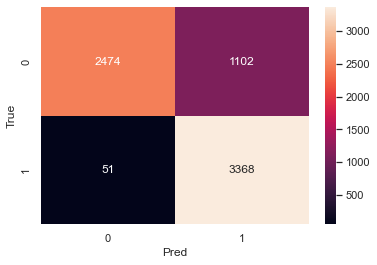

In [38]:
cm = confusion_matrix(Ytest, Ypred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()